In [1]:
!pip install numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 9.8 MB/s eta 0:00:00:00:010:01m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.8 MB/s eta 0:00:00a 0:00:01


In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def arri_linear_to_logc3(x):
    cut = 0.010591
    a = 5.555556
    b = 0.052272
    c = 0.247190
    d = 0.385537
    e = 5.367655
    f = 0.092809
    if x > cut:
        return c * np.log10(a * x + b) + d
    else:
        return e * x + f


In [103]:
LUT_SIZE = 9
DOMAIN_MAX = 55
DOMAIN_MIN = 0
lut_x_coords = np.linspace(DOMAIN_MIN, DOMAIN_MAX, LUT_SIZE)
lut_y_coords = np.array([arri_linear_to_logc3(x) for x in lut_x_coords])


def interpolate_lut(x, lut_x_coords, lut_y_coords):
    if x <= DOMAIN_MIN:
        return lut_y_coords[0]
    if x >= DOMAIN_MAX:
        return lut_y_coords[-1]

    for i in range(LUT_SIZE - 1):
        if lut_x_coords[i] <= x <= lut_x_coords[i + 1]:
            break
    t = (x - lut_x_coords[i]) / (lut_x_coords[i + 1] - lut_x_coords[i])
    return lut_y_coords[i] * (1 - t) + lut_y_coords[i + 1] * t

In [120]:
TRUE_FUNCTION_SAMPLES = 2**16 # plt.plot won't plot a curve, but with enough samples we can approximate the curve very accurately.

true_function_x_coords = np.linspace(DOMAIN_MIN, DOMAIN_MAX, TRUE_FUNCTION_SAMPLES)
true_function_y_coords = np.array([arri_linear_to_logc3(x) for x in true_function_x_coords])

interpolated_x_coords = np.linspace(DOMAIN_MIN, DOMAIN_MAX, TRUE_FUNCTION_SAMPLES)
interpolated_y_coords = np.array([interpolate_lut(x, lut_x_coords, lut_y_coords) for x in interpolated_x_coords])

# Uniformly sampling in log space rather than in linear.
log_lut_x_coords = [DOMAIN_MIN] + list(DOMAIN_MAX * np.exp2(np.linspace(-16, 0, LUT_SIZE - 1)))
log_lut_y_coords = np.array([arri_linear_to_logc3(x) for x in log_lut_x_coords])

log_interpolated_x_coords = [DOMAIN_MIN] + list(DOMAIN_MAX * np.exp2(np.linspace(-16, 0, TRUE_FUNCTION_SAMPLES - 1)))
log_interpolated_y_coords = np.array([interpolate_lut(x, log_lut_x_coords, log_lut_y_coords) for x in log_interpolated_x_coords])

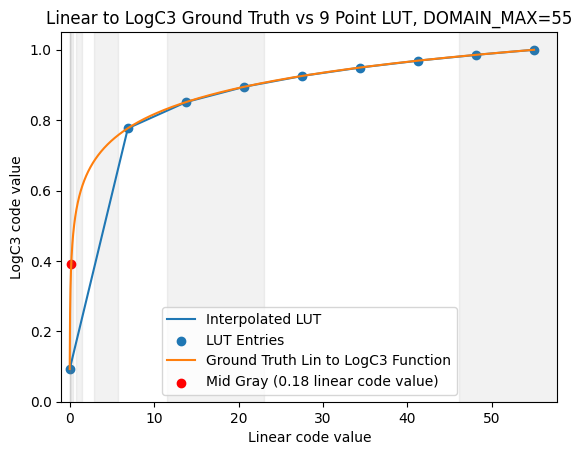

In [121]:
plt.plot(interpolated_x_coords, interpolated_y_coords, label='Interpolated LUT')
plt.scatter(lut_x_coords, lut_y_coords, label='LUT Entries')
plt.plot(true_function_x_coords, true_function_y_coords, label='Ground Truth Lin to LogC3 Function')
plt.scatter([0.18], [arri_linear_to_logc3(0.18)], label='Mid Gray (0.18 linear code value)', color='red')
plt.xlabel('Linear code value')
plt.ylabel('LogC3 code value')
plt.title(f'Linear to LogC3 Ground Truth vs {LUT_SIZE} Point LUT, DOMAIN_MAX={DOMAIN_MAX}')
for i in range(-8, int(np.log2(DOMAIN_MAX / 0.18)) + 1, 2):
    plt.fill_betweenx([0, 1.05], 0.18 * 2**i, 0.18 * 2**(i + 1), color='gray', alpha=0.1)
plt.ylim(0, 1.05)
plt.xlim(DOMAIN_MIN-1, DOMAIN_MAX * 1.05)
plt.legend()
plt.savefig(f'../images/posts/lut_linear/plot_lut_vs_gt_size_{LUT_SIZE}_domain_max_{DOMAIN_MAX}.png', dpi=300)

/var/folders/hq/hmwml30119vdrkc5_qz6t96w0000gn/T/ipykernel_52853/904684092.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(DOMAIN_MIN-1, DOMAIN_MAX * 1.05)


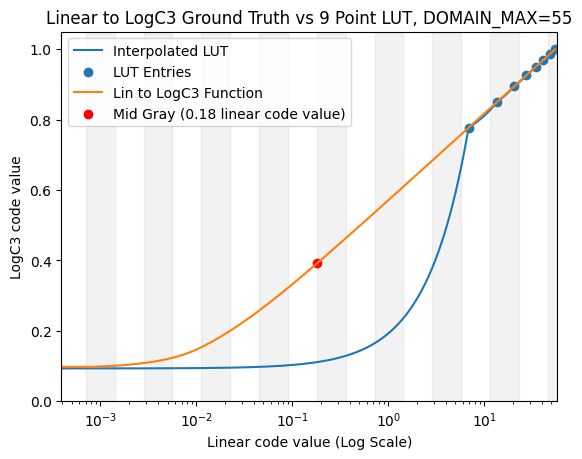

In [122]:
plt.plot(interpolated_x_coords, interpolated_y_coords, label='Interpolated LUT')
plt.scatter(lut_x_coords, lut_y_coords, label='LUT Entries')
plt.plot(true_function_x_coords, true_function_y_coords, label='Lin to LogC3 Function')
plt.scatter([0.18], [arri_linear_to_logc3(0.18)], label='Mid Gray (0.18 linear code value)', color='red')
plt.xlabel('Linear code value (Log Scale)')
plt.ylabel('LogC3 code value')
plt.title(f'Linear to LogC3 Ground Truth vs {LUT_SIZE} Point LUT, DOMAIN_MAX={DOMAIN_MAX}')
for i in range(-8, int(np.log2(DOMAIN_MAX / 0.18)) + 1, 2):
    plt.fill_betweenx([0, 1.05], 0.18 * 2**i, 0.18 * 2**(i + 1), color='gray', alpha=0.1)
plt.legend()
plt.xscale('log')
plt.ylim(0, 1.05)
plt.xlim(DOMAIN_MIN-1, DOMAIN_MAX * 1.05)
plt.savefig(f'../images/posts/lut_linear/plot_lut_vs_gt_size_{LUT_SIZE}_domain_max_{DOMAIN_MAX}_log.png', dpi=300)

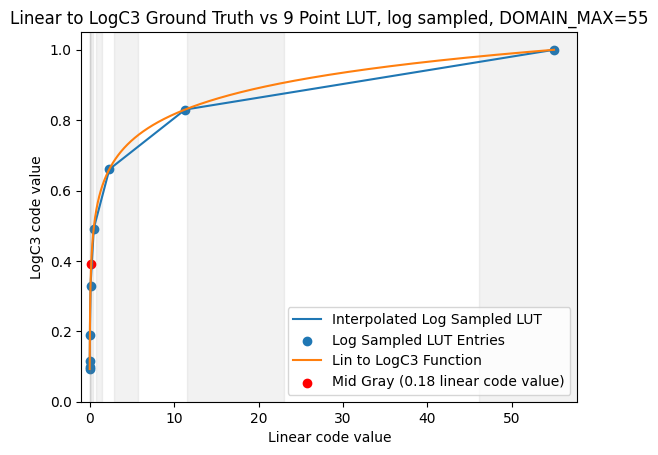

In [123]:
plt.plot(log_interpolated_x_coords, log_interpolated_y_coords, label='Interpolated Log Sampled LUT')
plt.scatter(log_lut_x_coords, log_lut_y_coords, label='Log Sampled LUT Entries')
plt.plot(true_function_x_coords, true_function_y_coords, label='Lin to LogC3 Function')
plt.scatter([0.18], [arri_linear_to_logc3(0.18)], label='Mid Gray (0.18 linear code value)', color='red')
plt.xlabel('Linear code value')
plt.ylabel('LogC3 code value')
plt.title(f'Linear to LogC3 Ground Truth vs {LUT_SIZE} Point LUT, log sampled, DOMAIN_MAX={DOMAIN_MAX}')
for i in range(-8, int(np.log2(DOMAIN_MAX / 0.18)) + 1, 2):
    plt.fill_betweenx([0, 1.05], 0.18 * 2**i, 0.18 * 2**(i + 1), color='gray', alpha=0.1)
plt.legend()
plt.ylim(0, 1.05)
plt.xlim(DOMAIN_MIN-1, DOMAIN_MAX * 1.05)
plt.savefig(f'../images/posts/lut_linear/plot_log_sampled_lut_vs_gt_size_{LUT_SIZE}_domain_max_{DOMAIN_MAX}.png', dpi=300)

/var/folders/hq/hmwml30119vdrkc5_qz6t96w0000gn/T/ipykernel_52853/1628153219.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(DOMAIN_MIN-1, DOMAIN_MAX * 1.05)


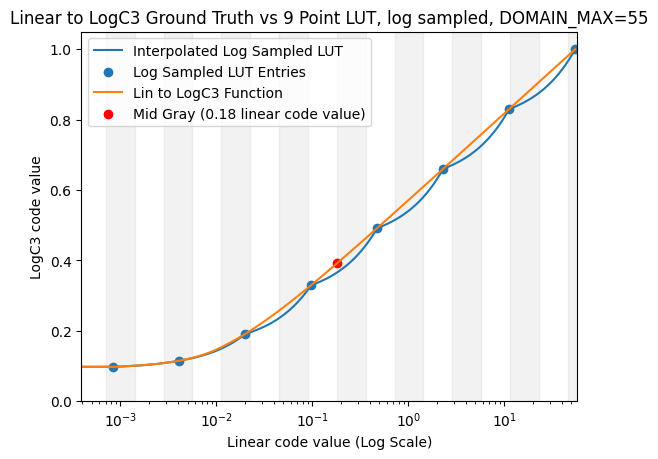

In [124]:
plt.plot(log_interpolated_x_coords, log_interpolated_y_coords, label='Interpolated Log Sampled LUT')
plt.scatter(log_lut_x_coords, log_lut_y_coords, label='Log Sampled LUT Entries')
plt.plot(true_function_x_coords, true_function_y_coords, label='Lin to LogC3 Function')
plt.scatter([0.18], [arri_linear_to_logc3(0.18)], label='Mid Gray (0.18 linear code value)', color='red')
plt.xlabel('Linear code value (Log Scale)')
plt.ylabel('LogC3 code value')
plt.title(f'Linear to LogC3 Ground Truth vs {LUT_SIZE} Point LUT, log sampled, DOMAIN_MAX={DOMAIN_MAX}')
for i in range(-8, int(np.log2(DOMAIN_MAX / 0.18)) + 1, 2):
    plt.fill_betweenx([0, 1.05], 0.18 * 2**i, 0.18 * 2**(i + 1), color='gray', alpha=0.1)
plt.legend()
plt.xscale('log')
plt.ylim(0, 1.05)
plt.xlim(DOMAIN_MIN-1, DOMAIN_MAX * 1.05)
plt.savefig(f'../images/posts/lut_linear/plot_log_sampled_lut_vs_gt_size_{LUT_SIZE}_domain_max_{DOMAIN_MAX}_log.png', dpi=300)